In [1]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
from tqdm.notebook import tnrange,tqdm
import pandas as pd
import os

In [2]:
from diffusion_simulation import diffusion_simulation
from network import network

In [3]:
beta, s = 3.5, 1

In [4]:
params = {'sim_id':f'example', 'alpha':0.1, 'beta':beta,
          'noise_dist': 'logistic', 'noise_dist_param': s,
          'cnt_iter': 100000, 't_warmup':1000, 'is_traj':False, 
          'is_network_given':True, 'network_dir':f'../instances/example/edge.csv',  
          'is_value_given':True, 'value_dir':f'../instances/example/v.csv'
         }
    
G = network(params)
sample = diffusion_simulation(G,params)
sample.cal_exact()
sample.run_fixed_point()
sample.output()

Instance generated with 10 nodes.


C:\Users\LinYunduan\Documents\github\Nonprogressive_Diffusion\code\diffusion_simulation.py:124: ComplexWarning: Casting complex values to real discards the imaginary part
  stationary = stationary.astype(float)


In [5]:
# Data for Figure 1 (also shown in Table EC.1)

df = pd.read_csv(f'../instances/example/results.csv')
df['diff'] = df['fp'] - df['exact']
df

,exact,fp,diff
0,0.512630,0.529244,0.016614
1,0.593175,0.606898,0.013723
2,0.632540,0.652398,0.019858
3,0.144236,0.122080,-0.022156
4,0.782660,0.821919,0.039259
5,0.193339,0.173101,-0.020238
6,0.734083,0.775520,0.041437
7,0.328690,0.284926,-0.043764
8,0.670153,0.764572,0.094419
9,0.741589,0.878649,0.137060


In [6]:
L = 1/(4*s)
rho = beta * L
c = rho/(1-rho)/(1-rho/2)

normalized_centrality = (1-rho)*la.inv(np.identity(sample.G.n)-rho*sample.G.A) @ sample.G.b

error = np.abs(df['diff'])

(0.005, 0.15)

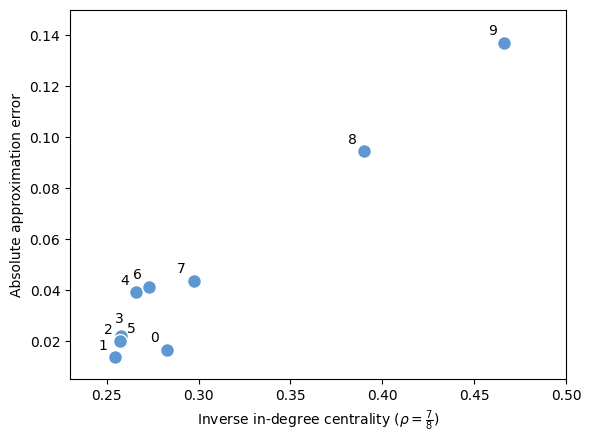

In [8]:
# Figure 2

plt.scatter(normalized_centrality, error, c='#5f97d2', edgecolor='white', s=100)
plt.xlabel('Inverse in-degree centrality ($\\rho=\\frac{7}{8}$)')
plt.ylabel('Absolute approximation error')

for i in range(0,3):
    plt.text(normalized_centrality[i]-0.009, error[i]+0.003, i)
plt.text(normalized_centrality[3]-0.003, error[3]+0.005, 3)
plt.text(normalized_centrality[4]-0.009, error[4]+0.003, 4)
plt.text(normalized_centrality[5]+0.004, error[5]+0.003, 5)
for i in range(6,sample.G.n):
    plt.text(normalized_centrality[i]-0.009, error[i]+0.003, i)

plt.xlim(0.23,0.5)
plt.ylim(0.005,0.15)